<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Decomposition

### Learning Objectives
 
**After this lesson, you will be able to:**
- Describe the different components of time series data (trend, seasonality, cyclical, and residual).
- Decompose time series data into trend, seasonality, cyclical, and residual components.
- Plot the decomposed components of a time series.

### Lesson Guide

#### Decomposition
- [Time Series Decomposition](#A)
- [Decompose a Time Series](#B)
- [Plotting the Residuals and the ACF and PACF of the Residuals](#C)
- [Independent Practice](#D)
----

<h2><a id = "A">Time Series Decomposition</a></h2>

Splitting a time series into several components is useful for both understanding the data and diagnosing the appropriate forecasting model. Each of these components will represent an underlying pattern. 

- **Trend**: A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes, we will refer to a trend “changing direction” when, for example, it might go from an increasing trend to a decreasing trend.

- **Seasonal**: A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week). Seasonality is always of a fixed and known period.

- **Residual**: The leftover or error component.

### Guided Practice

We are going to play around with some bus data from Portland, Oregon. Load in the data set below and check it out.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from dateutil.relativedelta import *

%matplotlib inline

bus = pd.read_csv('./data/bus.csv')
bus.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [2]:
bus.shape

(116, 2)

In [3]:
# Note NaN values in last two rows
bus.tail()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327
114,NaN,NaN
115,Portland Oregon average monthly bus ridership ...,n=114


In [4]:
bus.isnull().sum()

Month                                                                                         1
Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114    1
dtype: int64

In [5]:
bus.dtypes

Month                                                                                         object
Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114    object
dtype: object

We'll need to clean this data a little. Let's simplify the names of the columns. There are also a couple of bad rows at the end of the file. We'll get rid of those. Additionally, we need to make the `riders` column an integer. 

In [6]:
bus.columns = ['index','riders']

In [7]:
bus.drop(bus.index[115], inplace=True)
bus.drop(bus.index[114], inplace=True)

In [8]:
bus['riders'] = bus.riders.apply(lambda x: int(x))
bus.head()

,index,riders
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [9]:
bus.dtypes

index     object
riders     int64
dtype: object

We're going to create an artificial date index using the `relativedelta()` function, as shown below. We will simply start at `1973-01-01` and iterate up one month at a time. NOTE - this shifts the timeline up.

`relativedelta()` Python function can be applied to an existing datetime object to replace specific components.

In [10]:
# datetime.strptime() parses input string to datetime type with a given format of YYYY-MM-DD
start = datetime.datetime.strptime("1973-01-01", "%Y-%m-%d")

# Apply relativedelta to each row formatting each date to YYYY-MM-DD
date_list = [start + relativedelta(months=x) for x in range(0, 114)] # Edited for 114 rows

bus['index'] = date_list

In [11]:
# Set index column as index
bus.set_index(['index'], inplace=True)
bus.index.name=None

bus.head()

,riders
1973-01-01,648
1973-02-01,646
1973-03-01,639
1973-04-01,654
1973-05-01,630


In [12]:
print("Start date:", bus.index.min())
print("End date:", bus.index.max())

Start date: 1973-01-01 00:00:00
End date: 1982-06-01 00:00:00


### StatsModels Time Series Tools 

The Python StatsModels library offers a wide variety of reliable time series analysis tools. We'll start off by loading the autocorrelation and partial autocorrelation functions, as well as a function for decomposing time series.

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Plot the raw data.

We can look at the raw data first. Let's plot the time series.

<AxesSubplot:title={'center':'Monthly Ridership (100,000s)'}>

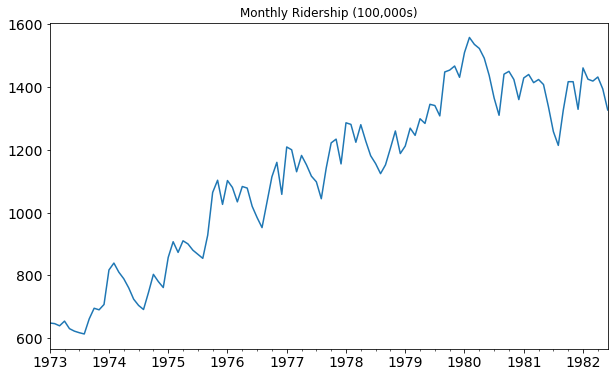

In [15]:
bus.riders.plot(figsize=(10,6), title= 'Monthly Ridership (100,000s)', fontsize=14)

In [ ]:
# Plot shows seasonal trend and amplitude of cycles seems the same 

In [16]:
bus.riders.describe()

count     114.000000
mean     1120.543860
std       270.888317
min       613.000000
25%       885.000000
50%      1158.000000
75%      1340.000000
max      1558.000000
Name: riders, dtype: float64

In [ ]:
# The series components seem linear so combined additively

<h2><a id = "B">Decompose the time series and plot using the `.seasonal_decompose()` function.</a></h2>

Using the `seasonal_decompose()` function, we can break the time series into its constituent parts.

Use the function on the `riders` data with a frequency of `12`, then plot the data. We're using a frequency of 12 because the data are monthly.

The decomposition object from `seasonal_decompose()` has a `.plot()` function, like with Pandas DataFrames.

In [18]:
decomposition = seasonal_decompose(bus.riders, model='additive', period=12)  

<Figure size 432x288 with 0 Axes>

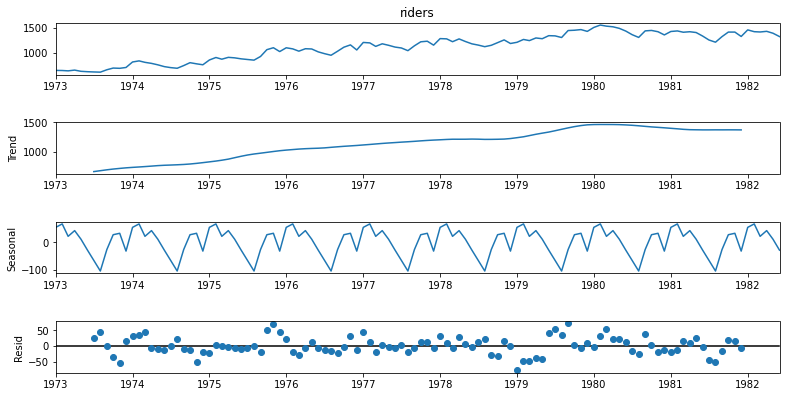

In [19]:
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 6)

In [ ]:
# Residuals do not show a pattern over time, so this seems a good fit

### Plot a single component of the decomposition plot.

We can pull out just one component of the decomposition plot.

<AxesSubplot:>

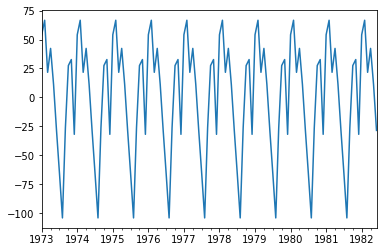

In [20]:
seasonal = decomposition.seasonal 
seasonal.plot()

<AxesSubplot:>

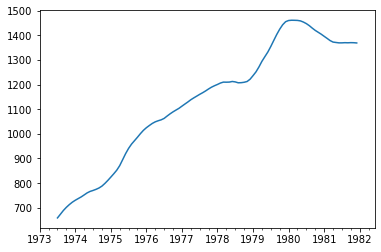

In [21]:
trend = decomposition.trend
trend.plot()

<h2><a id = "C">Examining the residuals and their ACF and PACF.</a></h2>

Let's examine the residuals of our data.

<AxesSubplot:>

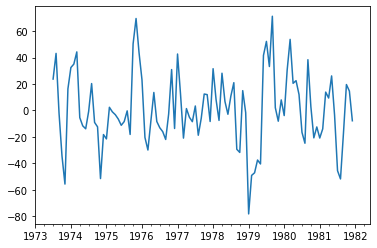

In [22]:
resid = decomposition.resid
resid.plot()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\shmel\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


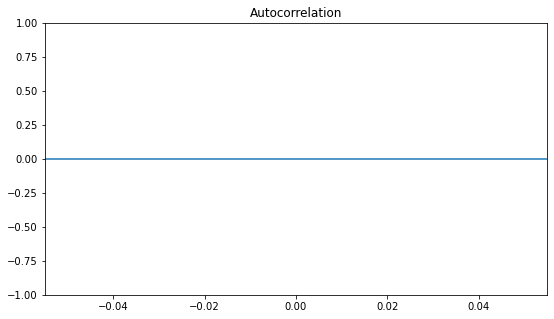

In [24]:
fig, ax = plt.subplots(figsize=(9, 5))
plot_acf(resid, lags=30, ax=ax)
plt.show();

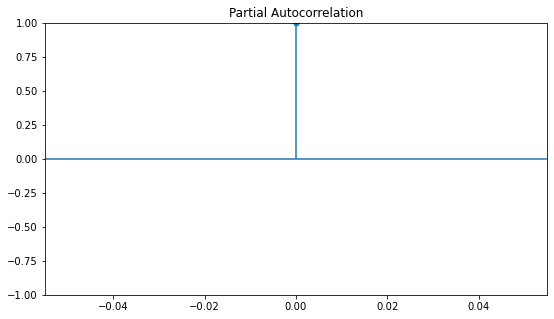

In [26]:
fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(resid, lags=30, method='ywm', ax=ax)
plt.show()

We notice that the residuals of our time series don't have significant autocorrelation. This is because the trend and seasonal components have been taken out and adjusted for. 

# Recap

* Trend is a long-term change in the data. 
* Seasonality is a pattern of a fixed period that repeats in the data. 
* Residuals are the error components of the data.
* StatsModels contains a `seasonal_decompose()` function that breaks a time series into its components.

<h2><a id="D">Independent Practice</a></h2>

**Instructor Note:** These are optional and can be assigned as student practice questions outside of class.

### 1) Import the Airline Passengers data set, preprocess the data, and plot the raw time series.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from dateutil.relativedelta import *

%matplotlib inline

In [2]:
airline = pd.read_csv('./data/airline.csv')

In [3]:
airline.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
airline.isnull().sum()

Month                                                                             0
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60    1
dtype: int64

In [5]:
airline.shape

(145, 2)

In [6]:
airline.columns = ['date', 'passengers']

In [7]:
airline.head()

,date,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [8]:
airline.dtypes

date           object
passengers    float64
dtype: object

In [9]:
# datetime.strptime() parses input string to datetime type with a given format of YYYY-MM-DD
start_ob = datetime.datetime.strptime("1949-01-01", "%Y-%m-%d")

# Apply relativedelta to each row formatting each date to YYYY-MM-DD
dates_list = [start_ob + relativedelta(months=x) for x in range(0, 145)]

airline['date'] = dates_list

In [10]:
# Set index column as index without column name
airline.set_index(['date'], inplace=True)
airline.index.name=None

In [11]:
airline.head()

,passengers
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:title={'center':'Monthly Airline Passengers (1000s)'}>

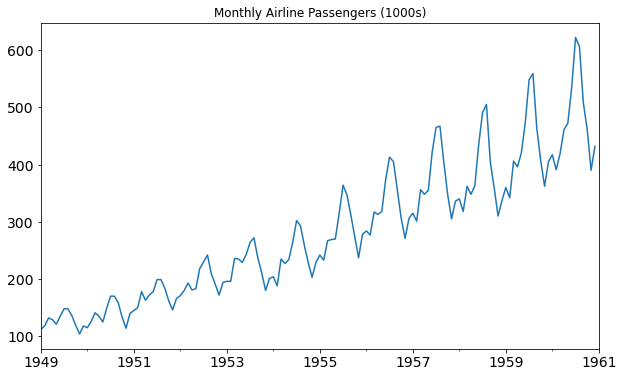

In [12]:
airline.passengers.plot(figsize=(10,6), title='Monthly Airline Passengers (1000s)', fontsize=14)

In [ ]:
# General increase in number and looks seasonal with increase in amplitude over time - multiplicative model

In [16]:
airline = airline.dropna(how='all')

In [17]:
# Trend confirmed by general increase in average number
airline.groupby(airline.index.year)['passengers'].mean()

1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
1960    476.166667
Name: passengers, dtype: float64

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

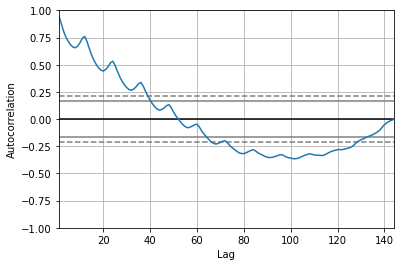

In [19]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(airline.passengers)

In [48]:
# Autocorrelation wobbles slowly to zero (no sharp cut-off) therefore use AR model

### 2) Decompose the time series and plot using the `.seasonal_decompose()` function.

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(airline.passengers, model='multiplicative', period=12) 

<Figure size 432x288 with 0 Axes>

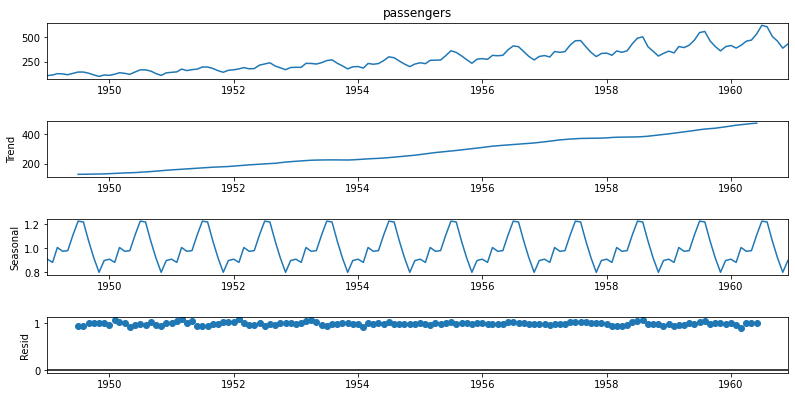

In [22]:
fig = plt.figure()  
fig = decomp.plot()  
fig.set_size_inches(12, 6)

In [23]:
# Interestingly, residuals show high variability throughout with high autocorrelation
# Trend and seasonality are the components characterising the time series

<AxesSubplot:>

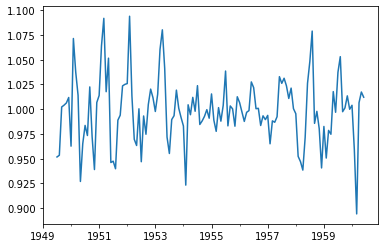

In [25]:
residual = decomp.resid
residual.plot()

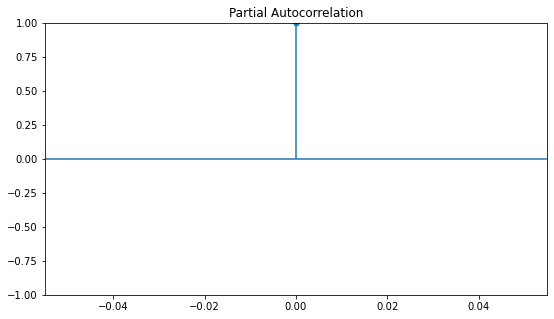

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(residual, lags=40, method='ywm', ax=ax)
plt.show();

### 3) Interpret these plots.

In [ ]:
# Consistently high correlation in residuals but more flattened shape
# Multiplicative model seems good fit, with reasonable results in trend and seasonality

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

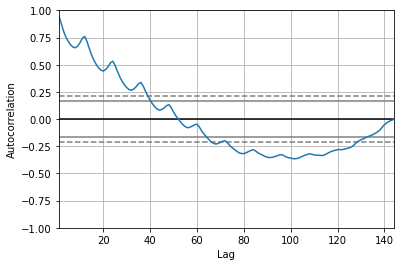

In [54]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(airline.passengers)

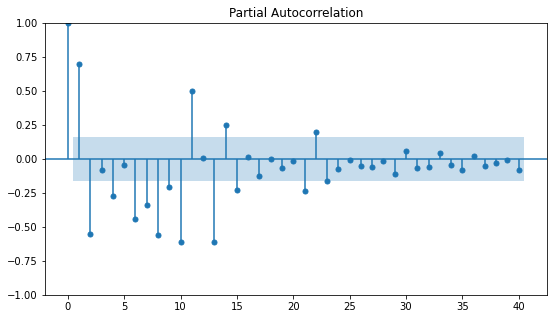

In [71]:
season = decomp.seasonal

fig, ax = plt.subplots(figsize=(9,5))
plot_pacf(season, lags=40, method='ywm', ax=ax)
plt.show();

In [ ]:
# Significant correlation throughout seasonal starts to dwindle after approx 22 lags
# Some big jumps in correlation lags 2, 10, 11, 13

In [65]:
airline['passengers'].autocorr(lag=2)

0.8956753113926396

In [66]:
airline['passengers'].autocorr(lag=4)

0.7977346989350624

In [67]:
airline['passengers'].autocorr(lag=6)

0.7839187959206183

In [68]:
airline['passengers'].autocorr(lag=10)

0.8827127951607838

In [69]:
airline['passengers'].autocorr(lag=15)

0.8114659384543109

In [ ]:
# Passengers number is strongly autocorrelated